## Imporve accuracy and reduce overfitting using Image Augmentation

In [1]:
import tensorflow as tf
import os

In [2]:
train_dir='cats_and_dogs_filtered/train'
test_dir='cats_and_dogs_filtered/validation'
train_cats_dir='cats_and_dogs_filtered/train/cats'
train_dogs_dir='cats_and_dogs_filtered/train/dogs'

In [3]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [4]:
## Image augmentation using keras ImageDataGenerator

from tensorflow.keras.preprocessing.image import ImageDataGenerator 


traindata = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

testdata = ImageDataGenerator(rescale=1./255)

train_generator = traindata.flow_from_directory(train_dir, 
                                                class_mode='binary',
                                                batch_size=20,
                                                target_size=(150,150))

validation_generator= testdata.flow_from_directory(test_dir, 
                                                  class_mode='binary',
                                                  batch_size=20,
                                                  target_size=(150,150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Build Model using Convolution layers

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [6]:
## compile model

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(lr=0.0001),
              metrics=['acc'])

In [7]:
## fit and train model 

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=70,           
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/70
100/100 [==============================] - 214s 2s/step - loss: 0.6954 - acc: 0.5140 - val_loss: 0.6851 - val_acc: 0.4990
Epoch 2/70
100/100 [==============================] - 276s 3s/step - loss: 0.6802 - acc: 0.5610 - val_loss: 0.6704 - val_acc: 0.5370
Epoch 3/70
100/100 [==============================] - 217s 2s/step - loss: 0.6705 - acc: 0.5800 - val_loss: 0.6443 - val_acc: 0.6120
Epoch 4/70
100/100 [==============================] - 256s 3s/step - loss: 0.6599 - acc: 0.6060 - val_loss: 0.6218 - val_acc: 0.6650
Epoch 5/70
100/100 [==============================] - 195s 2s/step - loss: 0.6501 - acc: 0.6260 - val_loss: 0.6728 - val_acc: 0.5640
Epoch 6/70
100/100 [==============================] - 182s 2s/step - loss: 0.6391 - acc: 0.6245 - val_loss: 0.6317 - val_acc: 0.6240
Epoch 7/70
100/100 [=============

Epoch 59/70
100/100 [==============================] - 120s 1s/step - loss: 0.4369 - acc: 0.7985 - val_loss: 0.5092 - val_acc: 0.7590
Epoch 60/70
100/100 [==============================] - 120s 1s/step - loss: 0.4399 - acc: 0.7890 - val_loss: 0.4767 - val_acc: 0.7750
Epoch 61/70
100/100 [==============================] - 120s 1s/step - loss: 0.4318 - acc: 0.8075 - val_loss: 0.4377 - val_acc: 0.7990
Epoch 62/70
100/100 [==============================] - 120s 1s/step - loss: 0.4145 - acc: 0.8160 - val_loss: 0.4509 - val_acc: 0.7830
Epoch 63/70
100/100 [==============================] - 123s 1s/step - loss: 0.4220 - acc: 0.8075 - val_loss: 0.4306 - val_acc: 0.7830
Epoch 64/70
100/100 [==============================] - 123s 1s/step - loss: 0.4172 - acc: 0.8145 - val_loss: 0.4565 - val_acc: 0.7810
Epoch 65/70
100/100 [==============================] - 120s 1s/step - loss: 0.4269 - acc: 0.8035 - val_loss: 0.4299 - val_acc: 0.7940
Epoch 66/70
100/100 [==============================] - 120s 1s

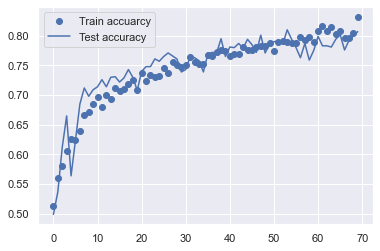

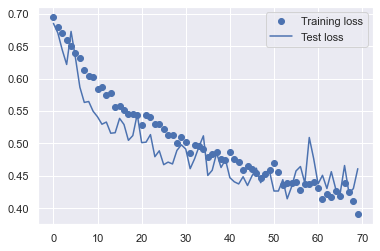

In [8]:
## ploting accuracy and loss with epochs

acc= history.history['acc']
val_acc= history.history['val_acc']
loss= history.history['loss']
val_loss= history.history['val_loss']

epochs= range(len(acc))

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.plot(epochs, acc, 'bo', label='Train accuarcy')
plt.plot(epochs, val_acc, 'b', label='Test accuracy')
plt.legend()
plt.show()


plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Test loss')
plt.legend()
plt.show()


 File name, make sure file should be in same folder as notebook: cat.jpeg
 cat


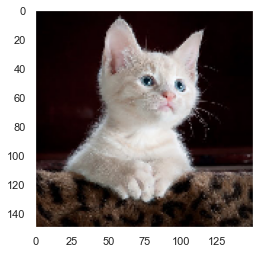

In [10]:
from tensorflow.keras.preprocessing import image
path=input(' File name, make sure file should be in same folder as notebook: ')

img1= image.load_img(path, target_size=(150,  150))
plt.grid(False)
plt.imshow(img1)
img= image.img_to_array(img1)
image= img.reshape(1, 150, 150, 3)
classes= model.predict(image)


if classes[0]>0.5:
    print( " dog")
    
else:
    print( " cat")

###### How to save your model as use it in future without training and saving time##########

In [11]:
from tensorflow.keras.models import model_from_json

model_json= model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)
model.save_weights('model.h5')

print("saved model to disk")

saved model to disk


In [12]:
json_file= open('model.json', 'r')
loaded_model_json= json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
print("Loaded model form disk")
loaded_model.compile(loss='binary_crossentropy',optimizer= 'rmsprop',metrics=['accuracy'])

classes= model.predict(image)


if classes[0]>0.5:
    print( " dog")
    
else:
    print( " cat")

Loaded model form disk
 cat
